In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
df = pd.read_csv('../stroke-data.csv')
df.dropna(subset='bmi',inplace=True)

In [9]:
n = 25
sample_df = df.sample(n,random_state=1)

bmi_data = sample_df['bmi']

## 신뢰구간

In [11]:
# 표본 평균
sample_mean = np.mean(bmi_data)

#표본 표준편차
s = np.std(bmi_data)

#표준 오차의 근차값

se = s/np.sqrt(n)


# t분포 기반 신뢰구간 구하기
stats.t.interval(confidence= 0.95, df = n-1 ,loc = sample_mean, scale = se )

(np.float64(27.667585189423043), np.float64(32.87641481057696))

## 가설검정 실습 
## 가설검정은 *데이터로 가설을 평가하는 과정*입니다.
### *STEP 1: 가설 설정*
 - H₀: 귀무가설
 - H₁: 대립가설
### *STEP 2: 검정 방법 선택*
 - z-검정, t-검정, 카이제곱, F-검정 등
### *STEP 3: 유의수준 결정*
 - 보통 *α = 0.05* 사용
### *STEP 4: 검정통계량 & p-value 계산*
 - 표본 → 검정통계량 → p-value
### *STEP 5: 결론*
 - p ≤ α → 귀무가설 기각
 - p > α → 귀무가설 채택(유지)

### **STEP 1: 가설 설정**
  - 귀무가설: bmi의 평균은 30.272이다.
  - 대립가설: bmi의 평균은 30.272이 아니다.


In [14]:
print(f'귀무가설 : {bmi_data.mean()}')

귀무가설 : 30.272000000000002


### **STEP 2: 검정 방법 선택**
 - 선택한 방법 : 단일표본 t-검정
  - 표본이 1개이고, 기준값과의 비교를 하고 있음. 모집단의 표준편차를 모르는 상황(가정)
 - 단일표본 t-검정을 사용해도 확인
  - 단일표본 t-검정 전제 : 정규성
  - n > 30이면 보통 정규성을 가정할 수 있지만 이상치가 많은 데이터이거나 특수한 분포를 가지는 경우, 정규성을 가정하기 어려울 수 있다.
  - 정규성 가정 확인을 위한 방법으로는 qq-plot 시각화하고, 정규성 검정(Kolmogorov-Sminov 검정)을 별도 시행한다.


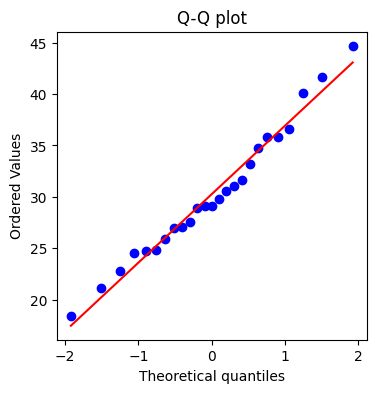

In [27]:
plt.figure(figsize=(4,4))
stats.probplot(bmi_data, plot=plt)
plt.title("Q-Q plot")
plt.show()


In [15]:
stat, p = stats.kstest(bmi_data,'norm',args=(sample_mean,s))
print("statiscs = " , stat, "p-value", p)

if p > 0.05:
    print('정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)')
else:
    print('정규성을 만족하지 않는다(귀무가설 기각)')

statiscs =  0.09664739454966476 p-value 0.9560303107107065
정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)


- **STEP 3: 유의수준 결정**
 - α = 0.05

- **STEP 4: 검정통계량 & p-value 계산**

In [16]:
# 단일 표본 검정 : stats.ttest_1samp
t_stat, p_value = stats.ttest_1samp(bmi_data, popmean = 30.272)

print('One_sample t-test')
print(f'검정통계량(t_statistics) = {t_stat:.4f}, p_value = {p_value:.4f}')

One_sample t-test
검정통계량(t_statistics) = 0.0000, p_value = 1.0000


- 결과 
p-value가 1 : 항상 귀무가설이 참이다 -> 귀무가설 채택 > 평균이 30.272 이다.

#### 2.독립표본 t검정(이표본 t-검정) : 서로 다른 표본 2개의 평균 비교

뇌졸중에 걸린 사람과 걸리지 않은 사람, 두 집단의 bmi를 비교

In [20]:
# 뇌졸중 환자 집단 샘플
sample_df_a = df.loc[df['stroke']==1].sample(n=40 , random_state=1)

# 비뇌졸중 환자 집단 샘플
sample_df_b = df.loc[df['stroke']==0].sample(n=40 , random_state=1)

In [22]:
bmi_data_a = sample_df_a['bmi'].values
bmi_data_b = sample_df_b['bmi'].values

- **STEP 1: 가설 설정**
  - 귀무가설: 두 집단의 bmi 평균은 같다.
  - 대립가설: 두 집단의 bmi 평균은 다르다.

In [26]:
# 두 집단의 평균 구하기
print('a :' , np.mean(bmi_data_a))
print('b :' , np.mean(bmi_data_b))

a : 30.115
b : 28.354999999999997


- **STEP 2: 검정 방법 선택**
 - 선택한 방법 : 2표본 t-검정
  - 표본이 2개이고, 서로 평균을 비교하고 있음.
 - 2표본 t-검정을 사용해도 확인
  - 2표본 t-검정 전제 : 정규성, 등분산성
   - 정규성 : n > 30이면 보통 정규성을 가정할 수 있지만 이상치가 많은 데이터이거나 특수한 분포를 가지는 경우, 정규성을 가정하기 어려울 수 있다.
    - 정규성 가정 확인을 위한 방법으로는 qq-plot 시각화하고, 정규성 검정(Kolmogorov-Sminov 검정)을 별도 시행한다.
   - 등분산성 : 두 집단의 분산이 같은지 확인
    - 두 집단의 분산이 다를 경우, 일반적인 2표본 t-검정을 사용할 수 없다.

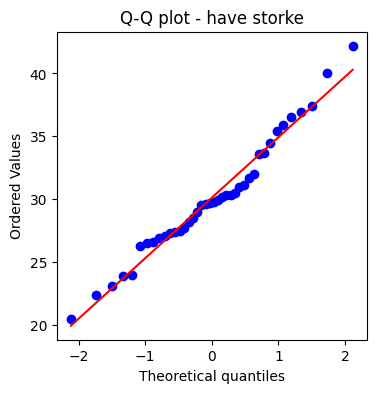

statiscs =  0.14779603744458747 p-value 0.3148685028513951
정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)


In [36]:
plt.figure(figsize=(4,4))
stats.probplot(bmi_data_a, plot=plt)
plt.title("Q-Q plot - have storke")
plt.show()

stat, p = stats.kstest(bmi_data_a,'norm',args=(sample_mean,s))
print("statiscs = " , stat, "p-value", p)

if p > 0.05:
    print('정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)')
else:
    print('정규성을 만족하지 않는다(귀무가설 기각)')

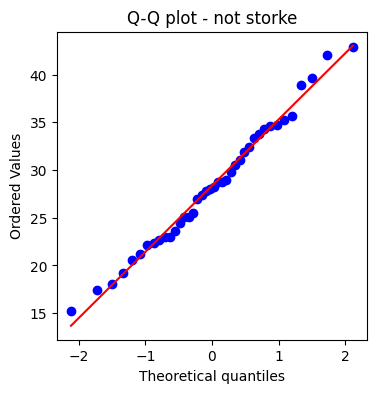

In [30]:
plt.figure(figsize=(4,4))
stats.probplot(bmi_data_b, plot=plt)
plt.title("Q-Q plot - not storke")
plt.show()

In [37]:
stat, p = stats.kstest(bmi_data_b,'norm',args=(sample_mean,s))
print("statiscs = " , stat, "p-value", p)

if p > 0.05:
    print('정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)')
else:
    print('정규성을 만족하지 않는다(귀무가설 기각)')

statiscs =  0.17988614319046958 p-value 0.13253536968265367
정규성을 만족한다고 볼수있음 (귀무가설 기각 불가)


In [38]:
#등분산성 검정 : Levene 검정

stat, p = stats.levene(bmi_data_a, bmi_data_b)
print('Levene Test : stat =', stat, 'p-value =', p)

if p > 0.05:
    print('등분산 가정 만족 (일반 t-test 사용가능)')
else:
    print('등분산 가정 불만족 (Welch T_test 권장)')
    

Levene Test : stat = 5.643653761236718 p-value = 0.01997345938928798
등분산 가정 불만족 (Welch T_test 권장)


- **STEP 3: 유의수준 결정**
 - α = 0.05

- **STEP 4: 검정통계량 & p-value 계산**

In [41]:
# Welch's T-test

t_stat, p_value = stats.ttest_ind(bmi_data_a, bmi_data_b,equal_var=False)
print("Two-sample Welch's t-test")
print(f't-statstics = {t_stat:.4f}, p-value = {p_value:.4f}')

Two-sample Welch's t-test
t-statstics = 1.3496, p-value = 0.1815
